In [1]:
#Cargar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Cargar el dataset
df = pd.read_csv("dirty_cafe_sales.csv")

### Exploración inicial

In [3]:
#Ver primeras filas del dataset
print(df.head())

  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   

   Location Transaction Date  
0  Takeaway       2023-09-08  
1  In-store       2023-05-16  
2  In-store       2023-07-19  
3   UNKNOWN       2023-04-27  
4  In-store       2023-06-11  


In [4]:
#Ver cantidad de filas y columnas
print(df.shape)

(10000, 8)


In [5]:
#Ver tipo de datos de cada columna 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB
None


In [6]:
#Ver cantidad de valores unicos
df.nunique()

Transaction ID      10000
Item                   10
Quantity                7
Price Per Unit          8
Total Spent            19
Payment Method          5
Location                4
Transaction Date      367
dtype: int64

In [7]:
#Funcion para ver valores unicos de cada columna exceptuando Transaction ID
def show_unique_values(df, excluir_col='Transaction ID'):
    for col in df.columns:
        if col == excluir_col:
            continue  
        print(f"\n🔹 {col} ({df[col].nunique()} únicos)")
        print(df[col].unique())

show_unique_values(df)


🔹 Item (10 únicos)
['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']

🔹 Quantity (7 únicos)
['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]

🔹 Price Per Unit (8 únicos)
['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']

🔹 Total Spent (19 únicos)
['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']

🔹 Payment Method (5 únicos)
['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]

🔹 Location (4 únicos)
['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']

🔹 Transaction Date (367 únicos)
['2023-09-08' '2023-05-16' '2023-07-19' '2023-04-27' '2023-06-11'
 '2023-03-31' '2023-10-06' '2023-10-28' '2023-07-28' '2023-12-31'
 '2023-11-07' 'ERROR' '2023-05-03' '2023-06-01' '2023-03-21' '2023-11-15'
 '2023-06-10' '2023-02-24' '2023-03-25' '2023-01-15' '2023-04-04'
 '2023-03-30' '2023-12-01' '2023-09-18' '2023-06-03' '2023-12-13'
 '2023-04-20' '2023-04-10' '2023-03-11'

In [8]:
#Funcion para ver cantidad de valores nulos por columna y porcentaje
def null_report(df):
    nulls = df.isna().sum()
    percentage = (df.isna().mean() * 100).round(2)
    report = pd.DataFrame({'Nulos': nulls, 'Porcentaje %': percentage})
    return report[report['Nulos'] > 0].sort_values(by='Nulos', ascending=False)

null_report(df)

,Nulos,Porcentaje %
Location,3265,32.65
Payment Method,2579,25.79
Item,333,3.33
Price Per Unit,179,1.79
Total Spent,173,1.73
Transaction Date,159,1.59
Quantity,138,1.38


In [9]:
#Ver estadistics descriptivas
print(df.describe())

       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_1961373  Juice        5            3.0         6.0   
freq                1   1171     2013           2429         979   

        Payment Method  Location Transaction Date  
count             7421      6735             9841  
unique               5         4              367  
top     Digital Wallet  Takeaway          UNKNOWN  
freq              2291      3022              159  


In [10]:
#Quitar espacios en blanco de strings
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].where(df[col].isna(), df[col].astype(str).str.strip())

In [11]:
#Reemplazar valores UNKNOWN, ERROR y nan por null
df.replace(['UNKNOWN', 'ERROR', 'nan'], pd.NA, inplace=True)

In [12]:
#Convetir columnas numericas a float
cols_num = ['Quantity', 'Price Per Unit', 'Total Spent']
for col in cols_num:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
#Convertir columna Transaction Date a Datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [14]:
#Ver rango de fechas de las transacciones
print("Fecha mínima:", df['Transaction Date'].min())
print("Fecha máxima:", df['Transaction Date'].max())

Fecha mínima: 2023-01-01 00:00:00
Fecha máxima: 2023-12-31 00:00:00


In [15]:
#Verificar cantidad de nulos nuevamente
null_report(df)

,Nulos,Porcentaje %
Location,3961,39.61
Payment Method,3178,31.78
Item,969,9.69
Price Per Unit,533,5.33
Total Spent,502,5.02
Quantity,479,4.79
Transaction Date,460,4.60


### Limpieza de columnas

In [16]:
#Ver valores unico en columna Quantity
df['Quantity'].unique()

array([ 2.,  4.,  5.,  3.,  1., nan])

In [17]:
#Ver valores unicos en columna Item
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', <NA>, 'Sandwich',
       nan, 'Juice', 'Tea'], dtype=object)

In [18]:
#Ver Valores unicos en columna PRice pet unit
df['Price Per Unit'].unique()

array([2. , 3. , 1. , 5. , 4. , 1.5, nan])

In [19]:
#Funcion para verificar valores nulos, no nulos y valores unicos por tipo de item
def check_price_per_unit(df):
    items = df['Item'].unique()
    for item in items:
        if pd.isna(item):
            subset = df[df['Item'].isna()]['Price Per Unit']
            item_label = 'NaN'
        else:
            subset = df[df['Item'] == item]['Price Per Unit']
            item_label = item

        count_non_null = subset.notna().sum()
        count_null = subset.isna().sum()
        unique_values = sorted(subset.dropna().unique())

        print(f'Item: {item_label}')
        print(f'  Valores no nulos en "Price Per Unit": {count_non_null}')
        print(f'  Valores nulos en "Price Per Unit": {count_null}')
        print(f'  Valores únicos no nulos: {unique_values}\n')
check_price_per_unit(df)       

Item: Coffee
  Valores no nulos en "Price Per Unit": 1108
  Valores nulos en "Price Per Unit": 57
  Valores únicos no nulos: [2.0]

Item: Cake
  Valores no nulos en "Price Per Unit": 1085
  Valores nulos en "Price Per Unit": 54
  Valores únicos no nulos: [3.0]

Item: Cookie
  Valores no nulos en "Price Per Unit": 1026
  Valores nulos en "Price Per Unit": 66
  Valores únicos no nulos: [1.0]

Item: Salad
  Valores no nulos en "Price Per Unit": 1082
  Valores nulos en "Price Per Unit": 66
  Valores únicos no nulos: [5.0]

Item: Smoothie
  Valores no nulos en "Price Per Unit": 1036
  Valores nulos en "Price Per Unit": 60
  Valores únicos no nulos: [4.0]

Item: NaN
  Valores no nulos en "Price Per Unit": 915
  Valores nulos en "Price Per Unit": 54
  Valores únicos no nulos: [1.0, 1.5, 2.0, 3.0, 4.0, 5.0]

Item: Sandwich
  Valores no nulos en "Price Per Unit": 1082
  Valores nulos en "Price Per Unit": 49
  Valores únicos no nulos: [4.0]

Item: NaN
  Valores no nulos en "Price Per Unit": 915


In [20]:
df[df['Item'].isna()][['Quantity', 'Price Per Unit', 'Total Spent']].head()

,Quantity,Price Per Unit,Total Spent
6,3.0,3.0,9.0
8,5.0,3.0,15.0
14,2.0,1.5,3.0
30,5.0,2.0,10.0
31,2.0,1.0,NaN


In [21]:
#Asigna el precio correspondiente en Price per unit para cada ítem cuando su valor sea nulo
price_item = {
    'Coffee': 2,
    'Cake': 3,
    'Cookie': 1,
    'Salad': 5,
    'Smoothie': 4,
    'Sandwich': 4,
    'Juice': 3,
    'Tea': 1.5
}

for item, price in price_item.items():
    correct_price = (df['Item'] == item) & (df['Price Per Unit'].isna())
    df.loc[correct_price, 'Price Per Unit'] = price

In [23]:
# Asignar valores en Item en bae a Price per unit, excluyendo precios ambiguos (smoothie y Sandwich)
price_item_reverse = {
    2.0: 'Coffee',
    3.0: 'Cake',
    1.0: 'Cookie',
    5.0: 'Salad',
    4.0: 'Sandwich',
    1.5: 'Tea'
}

for price, item in price_item_reverse.items():
    condition = (df['Item'].isna()) & (df['Price Per Unit'] == price)
    df.loc[condition, 'Item'] = item

In [24]:
#Verificamos valores nulos por item nuevamente
check_price_per_unit(df) 

Item: Coffee
  Valores no nulos en "Price Per Unit": 1284
  Valores nulos en "Price Per Unit": 0
  Valores únicos no nulos: [2.0]

Item: Cake
  Valores no nulos en "Price Per Unit": 1373
  Valores nulos en "Price Per Unit": 0
  Valores únicos no nulos: [3.0]

Item: Cookie
  Valores no nulos en "Price Per Unit": 1209
  Valores nulos en "Price Per Unit": 0
  Valores únicos no nulos: [1.0]

Item: Salad
  Valores no nulos en "Price Per Unit": 1270
  Valores nulos en "Price Per Unit": 0
  Valores únicos no nulos: [5.0]

Item: Smoothie
  Valores no nulos en "Price Per Unit": 1096
  Valores nulos en "Price Per Unit": 0
  Valores únicos no nulos: [4.0]

Item: Sandwich
  Valores no nulos en "Price Per Unit": 1344
  Valores nulos en "Price Per Unit": 0
  Valores únicos no nulos: [4.0]

Item: Tea
  Valores no nulos en "Price Per Unit": 1199
  Valores nulos en "Price Per Unit": 0
  Valores únicos no nulos: [1.5]

Item: Juice
  Valores no nulos en "Price Per Unit": 1171
  Valores nulos en "Price Pe

In [25]:
#Reemplazar valores nulos en Total Spent con el resultado de Quantity * Price per unit cuando estos sean distintos a nulo
correct_total_spent = df['Total Spent'].isna() & df['Quantity'].notna() & df['Price Per Unit'].notna()
df.loc[correct_total_spent, 'Total Spent'] = (
    df.loc[correct_total_spent, 'Quantity'] * df.loc[correct_total_spent, 'Price Per Unit'])

In [26]:
#Reemplazar valores nulos en Quantity por el resultado de Total Spent/Price per unit cuando estos sean distintos a nulo
correct_quantity = df['Quantity'].isna() & df['Price Per Unit'].notna() & df['Total Spent'].notna()
df.loc[correct_quantity, 'Quantity'] = df.loc[correct_quantity, 'Total Spent'] / df.loc[correct_quantity, 'Price Per Unit']

In [27]:
#Reemplazar valores nulos en Price per unit por el resultado de Total Spent / Quantity cuando estos sean distintos a nulo
correct_unit_price = df['Price Per Unit'].isna() & df['Quantity'].notna() & df['Total Spent'].notna()
df.loc[correct_unit_price, 'Price Per Unit'] = df.loc[correct_unit_price, 'Total Spent'] / df.loc[correct_unit_price, 'Quantity']

In [28]:
#Verificar nuevamente valores nulos por item
check_price_per_unit(df) 

Item: Coffee
  Valores no nulos en "Price Per Unit": 1284
  Valores nulos en "Price Per Unit": 0
  Valores únicos no nulos: [2.0]

Item: Cake
  Valores no nulos en "Price Per Unit": 1373
  Valores nulos en "Price Per Unit": 0
  Valores únicos no nulos: [3.0]

Item: Cookie
  Valores no nulos en "Price Per Unit": 1209
  Valores nulos en "Price Per Unit": 0
  Valores únicos no nulos: [1.0]

Item: Salad
  Valores no nulos en "Price Per Unit": 1270
  Valores nulos en "Price Per Unit": 0
  Valores únicos no nulos: [5.0]

Item: Smoothie
  Valores no nulos en "Price Per Unit": 1096
  Valores nulos en "Price Per Unit": 0
  Valores únicos no nulos: [4.0]

Item: Sandwich
  Valores no nulos en "Price Per Unit": 1344
  Valores nulos en "Price Per Unit": 0
  Valores únicos no nulos: [4.0]

Item: Tea
  Valores no nulos en "Price Per Unit": 1199
  Valores nulos en "Price Per Unit": 0
  Valores únicos no nulos: [1.5]

Item: Juice
  Valores no nulos en "Price Per Unit": 1171
  Valores nulos en "Price Pe

In [29]:
#Ver cantidad de valores nulos en las columnas Quantity, Price Per Unit y Total Spent
print("Cantidad de NaN restantes:")
print(df[['Quantity', 'Price Per Unit', 'Total Spent']].isna().sum())

Cantidad de NaN restantes:
Quantity          23
Price Per Unit     6
Total Spent       23
dtype: int64


In [30]:
#Ver filas donde Price per unit = NaN
print("Filas donde 'Price Per Unit' es NaN:")
print(df[df['Price Per Unit'].isna()])

Filas donde 'Price Per Unit' es NaN:
     Transaction ID  Item  Quantity  Price Per Unit  Total Spent  \
1761    TXN_3611851   NaN       4.0             NaN          NaN   
2289    TXN_7524977  <NA>       4.0             NaN          NaN   
3779    TXN_7376255  <NA>       NaN             NaN         25.0   
4152    TXN_9646000  <NA>       2.0             NaN          NaN   
7597    TXN_1082717  <NA>       NaN             NaN          9.0   
9819    TXN_1208561   NaN       NaN             NaN         20.0   

      Payment Method  Location Transaction Date  
1761     Credit Card       NaN       2023-02-09  
2289            <NA>       NaN       2023-12-09  
3779             NaN  In-store       2023-05-27  
4152             NaN  In-store       2023-12-14  
7597  Digital Wallet  In-store       2023-12-13  
9819     Credit Card       NaN       2023-08-19  


In [31]:
#Ver filas donde Quantity = NaN
print("Filas donde 'Quantity' es NaN:")
print(df[df['Quantity'].isna()])

Filas donde 'Quantity' es NaN:
     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
236     TXN_8562645     Salad       NaN             5.0          NaN   
278     TXN_3229409     Juice       NaN             3.0          NaN   
641     TXN_2962976     Juice       NaN             3.0          NaN   
738     TXN_8696094  Sandwich       NaN             4.0          NaN   
2796    TXN_9188692      Cake       NaN             3.0          NaN   
3203    TXN_4565754  Smoothie       NaN             4.0          NaN   
3224    TXN_6297232    Coffee       NaN             2.0          NaN   
3401    TXN_3251829       Tea       NaN             1.5          NaN   
3779    TXN_7376255      <NA>       NaN             NaN         25.0   
4257    TXN_6470865    Coffee       NaN             2.0          NaN   
5841    TXN_5884081    Cookie       NaN             1.0          NaN   
7029    TXN_4628338    Coffee       NaN             2.0          NaN   
7297    TXN_9944500  Smoothie    

In [32]:
#Ver filas donde Total Spent = NaN
print("Filas donde 'Total Spent' es NaN:")
print(df[df['Total Spent'].isna()])

Filas donde 'Total Spent' es NaN:
     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
236     TXN_8562645     Salad       NaN             5.0          NaN   
278     TXN_3229409     Juice       NaN             3.0          NaN   
641     TXN_2962976     Juice       NaN             3.0          NaN   
738     TXN_8696094  Sandwich       NaN             4.0          NaN   
1761    TXN_3611851       NaN       4.0             NaN          NaN   
2289    TXN_7524977      <NA>       4.0             NaN          NaN   
2796    TXN_9188692      Cake       NaN             3.0          NaN   
3203    TXN_4565754  Smoothie       NaN             4.0          NaN   
3224    TXN_6297232    Coffee       NaN             2.0          NaN   
3401    TXN_3251829       Tea       NaN             1.5          NaN   
4152    TXN_9646000      <NA>       2.0             NaN          NaN   
4257    TXN_6470865    Coffee       NaN             2.0          NaN   
5841    TXN_5884081    Cookie 

In [33]:
#Ver valores unicos para Payment method
df['Payment Method'].unique()

array(['Credit Card', 'Cash', <NA>, 'Digital Wallet', nan], dtype=object)

In [34]:
#Ver valores unicos para Location
df['Location'].unique()

array(['Takeaway', 'In-store', <NA>, nan], dtype=object)

In [35]:
#Ver si hay relacion entre valor cash y el tipo de Location
cash_locations = df[df['Payment Method'] == 'Cash']['Location'].unique()
print("Ubicaciones donde el método de pago fue 'Cash':")
print(cash_locations)

Ubicaciones donde el método de pago fue 'Cash':
['In-store' <NA> 'Takeaway' nan]


Como no se encontró ninguna relación que ayude a seguir completando los valores faltantates se decide completar para las columnas Item, Payment Method y Location con el valor "Unknown"

In [36]:
#Reemplazar valores nulos en item, payment method, y location por unknown.
df['Item'] = df['Item'].fillna("Unknown")
df['Payment Method'] = df['Payment Method'].fillna("Unknown")
df['Location'] = df['Location'].fillna("Unknown")

In [37]:
#Crear nuevo dataset sin filas con valores nulos. Las filas con valores nulos se guardan en el dataset "df_incomplete"
df_clean = df.dropna(subset=['Quantity', 'Price Per Unit', 'Total Spent', 'Transaction Date'])
df_incomplete = df[~df.index.isin(df_clean.index)]

In [38]:
#Ver tipo de datos del nuevo dataset
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9514 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9514 non-null   object        
 1   Item              9514 non-null   object        
 2   Quantity          9514 non-null   float64       
 3   Price Per Unit    9514 non-null   float64       
 4   Total Spent       9514 non-null   float64       
 5   Payment Method    9514 non-null   object        
 6   Location          9514 non-null   object        
 7   Transaction Date  9514 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 669.0+ KB
None


In [39]:
#Ver outliers de columna Total Spent
Q1 = df_clean['Total Spent'].quantile(0.25)
Q3 = df_clean['Total Spent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Límite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")

outliers = df_clean[(df_clean['Total Spent'] < lower_bound) | (df_clean['Total Spent'] > upper_bound)]

print(f"Cantidad total de outliers: {len(outliers)}")

# Mostrar un resumen estadístico de los outliers
print(outliers['Total Spent'].describe())

Q1 (25%): 4.0
Q3 (75%): 12.0
IQR: 8.0
Límite inferior: -8.0
Límite superior: 24.0
Cantidad total de outliers: 259
count    259.0
mean      25.0
std        0.0
min       25.0
25%       25.0
50%       25.0
75%       25.0
max       25.0
Name: Total Spent, dtype: float64


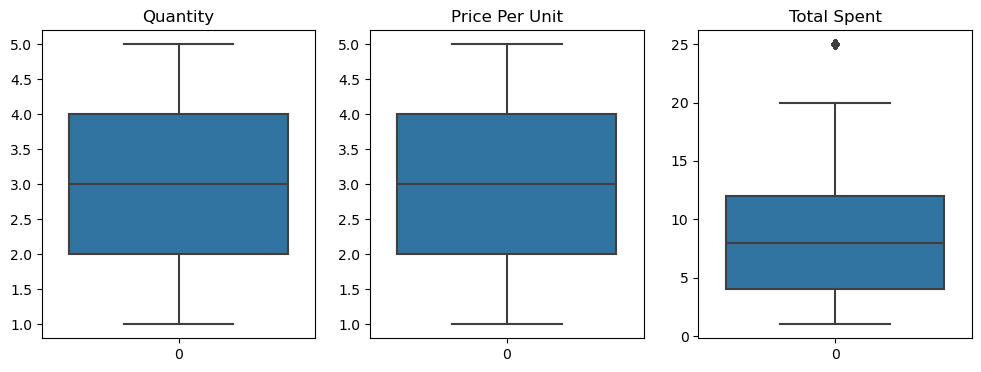

In [40]:
#Boxplot de outliers
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(df_clean['Quantity'])
plt.title('Quantity')

plt.subplot(1,3,2)
sns.boxplot(df_clean['Price Per Unit'])
plt.title('Price Per Unit')

plt.subplot(1,3,3)
sns.boxplot(df_clean['Total Spent'])
plt.title('Total Spent')

plt.show()

In [41]:
df_clean[df_clean['Total Spent'] == 25][['Item', 'Quantity', 'Price Per Unit', 'Total Spent']]

,Item,Quantity,Price Per Unit,Total Spent
10,Salad,5.0,5.0,25.0
51,Salad,5.0,5.0,25.0
52,Salad,5.0,5.0,25.0
96,Salad,5.0,5.0,25.0
100,Salad,5.0,5.0,25.0
...,...,...,...,...
9791,Salad,5.0,5.0,25.0
9805,Salad,5.0,5.0,25.0
9879,Salad,5.0,5.0,25.0
9908,Salad,5.0,5.0,25.0


El punto por fuera del Boxplot para Total Spent representa 259 observaciones que tienen exactamente el mismo valor: 25. Esto es muy unusual porque todos los outliers son identicos, y ademas se encuentra por el limite superior que es 24. No obstante corroboramos las compras con ese monto y vemos que son compras verdaderas. 


In [42]:
df_clean[df_clean['Item'] == 'Unknown']

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
118,TXN_4633784,Unknown,5.0,3.0,15.0,Unknown,In-store,2023-02-06
151,TXN_4031509,Unknown,4.0,4.0,16.0,Credit Card,Takeaway,2023-01-04
289,TXN_3495950,Unknown,4.0,1.5,6.0,Credit Card,In-store,2023-02-19
334,TXN_2523298,Unknown,4.0,1.5,6.0,Unknown,In-store,2023-03-25
550,TXN_4186681,Unknown,4.0,1.5,6.0,Digital Wallet,Unknown,2023-05-24
750,TXN_5787508,Unknown,3.0,3.0,9.0,Credit Card,Takeaway,2023-07-23
818,TXN_7940202,Unknown,1.0,4.0,4.0,Digital Wallet,Unknown,2023-07-23
1154,TXN_2473090,Unknown,2.0,1.5,3.0,Credit Card,In-store,2023-03-03
1337,TXN_5031214,Unknown,5.0,1.0,5.0,Unknown,Takeaway,2023-07-29
1377,TXN_8396271,Unknown,2.0,1.0,2.0,Unknown,Unknown,2023-09-12
